<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/Mar.-29/Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# John Mohsbeck
# Data Bank Churn dataset
# Data preparation
# EDA
# Feature Importance
# Logistic Regression model
# Performance Metrics

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("Churn_Modelling.csv")
print(len(df))
df.head()

10000


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Prep

Dataset

records: 10000

columns: 14

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0.0,83807.86,159660.8,0.0,125510.82
NumOfProducts,1,1,3,2,1


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Replace blanks with underscore "_" and transform column names to lower case.

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,hargrave,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,boni,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,mitchell,850,spain,female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.nunique()

rownumber          10000
customerid         10000
surname             2931
creditscore          460
geography              3
gender                 2
age                   70
tenure                11
balance             6382
numofproducts          4
hascrcard              2
isactivemember         2
estimatedsalary     9999
exited                 2
dtype: int64

In [ ]:
df['exited'].unique()

array([1, 0])

In [ ]:
df.dtypes

rownumber            int64
customerid           int64
surname             object
creditscore          int64
geography           object
gender              object
age                  int64
tenure               int64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

In [ ]:
df['exited'].nunique()

2

In [ ]:
df['exited'].sample(25)

9341    0
141     0
2366    0
7511    0
9737    0
4128    0
1862    1
9475    0
2193    0
6759    0
4855    0
890     0
946     1
5869    0
7749    1
3169    0
3055    0
422     1
4016    0
3068    0
5946    0
8466    0
6186    1
2211    0
9850    0
Name: exited, dtype: int64

In [ ]:
df.exited.value_counts()

0    7963
1    2037
Name: exited, dtype: int64

Checking for duplicates.
Found 0 duplicates.

In [ ]:
duplicates = df.duplicated()
print(duplicates.sum())

0


##Dataset is Imbalanced

Exited: 1622
Stay: 6378

1. Split df(80/20):  80% => df_train_full, 20% => df_test.

2. Split df_train_full(67/33):  67% => df_train, 33% => df_val.

In [ ]:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)
y_train = df_train.exited.values
y_val = df_val.exited.values
del df_train['exited']
del df_val['exited']


# EDA

In [ ]:
df_train_full.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [ ]:
df_train_full.exited.value_counts()

0    6378
1    1622
Name: exited, dtype: int64

In [ ]:
1622 / (6378 + 1622)

0.20275

Global Mean

In [ ]:
global_mean = df_train_full.exited.mean()
round(global_mean,5)

0.20275

In [ ]:
df.dtypes

rownumber            int64
customerid           int64
surname             object
creditscore          int64
geography           object
gender              object
age                  int64
tenure               int64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

List categorial features and numeric features.

In [ ]:
categorical = ['geography', 'gender', 'tenure', 'numofproducts', 'hascrcard', 'isactivemember']
numerical = ['creditscore', 'age', 'balance', 'estimatedsalary']

In [ ]:
df_train_full[categorical].nunique()

geography          3
gender             2
tenure            11
numofproducts      4
hascrcard          2
isactivemember     2
dtype: int64

In [ ]:
df_train_full[numerical].describe()

,creditscore,age,balance,estimatedsalary
count,8000.000000,8000.000000,8000.000000,8000.000000
mean,650.313625,38.887250,76463.443272,100143.429649
std,96.676990,10.468894,62372.543408,57574.884151
min,350.000000,18.000000,0.000000,91.750000
25%,583.000000,32.000000,0.000000,51014.837500
50%,651.000000,37.000000,97055.145000,99836.215000
75%,718.000000,44.000000,127639.372500,149373.527500
max,850.000000,92.000000,250898.090000,199970.740000


In [ ]:
df_train_full.corr()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
rownumber,1.000000,0.001165,0.003744,-0.009885,-0.008162,-0.008754,0.008319,-0.002024,-0.002751,-0.003735,-0.026526
customerid,0.001165,1.000000,0.004212,0.010086,-0.004541,-0.006472,0.013681,-0.013930,-0.002100,0.021884,-0.010516
creditscore,0.003744,0.004212,1.000000,-0.007697,-0.001942,-0.001585,0.015114,-0.001258,0.031762,0.000399,-0.026420
age,-0.009885,0.010086,-0.007697,1.000000,-0.012859,0.028930,-0.029657,-0.014857,0.088084,-0.010799,0.278079
tenure,-0.008162,-0.004541,-0.001942,-0.012859,1.000000,-0.007597,0.015562,0.024802,-0.030183,0.000881,-0.008248
balance,-0.008754,-0.006472,-0.001585,0.028930,-0.007597,1.000000,-0.313202,-0.013750,-0.011692,0.009864,0.116926
numofproducts,0.008319,0.013681,0.015114,-0.029657,0.015562,-0.313202,1.000000,0.005514,0.006243,0.018054,-0.040868
hascrcard,-0.002024,-0.013930,-0.001258,-0.014857,0.024802,-0.013750,0.005514,1.000000,-0.006068,-0.006200,-0.014177
isactivemember,-0.002751,-0.002100,0.031762,0.088084,-0.030183,-0.011692,0.006243,-0.006068,1.000000,-0.006182,-0.159633
estimatedsalary,-0.003735,0.021884,0.000399,-0.010799,0.000881,0.009864,0.018054,-0.006200,-0.006182,1.000000,0.006483


Age is positively correleated to exited.

Balance is positively correlated to exited.

numofproducts, hascrcard and isactivemember are negatively correlated to exited

# Feature Importance

In [ ]:
female_mean = df_train_full[df_train_full.gender == 'female'].exited.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].exited.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.249
gender == male:   0.164


Female risk ratio: 1.229;  high > 1.0 => risky

In [ ]:
female_mean / global_mean


1.2296637092961358

Male risk ratio: 0.807;  > 0.50 but < 1.0 => less risky than females

In [ ]:
male_mean / global_mean

0.8076816986463685

In [ ]:
df_group = df_train_full.groupby(by='gender').exited.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.249314,0.046564,1.229664
male,0.163757,-0.038993,0.807682


isactivemeber risk ratio

In [ ]:
isactivemember_no = df_train_full[df_train_full.isactivemember == 0].exited.mean()
print('isactivemember No:', round(isactivemember_no, 3))

isactivemember_yes = df_train_full[df_train_full.isactivemember == 1].exited.mean()
print('isactivemember Yes:', round(isactivemember_yes, 3))

isactivemember No: 0.268
isactivemember Yes: 0.14


isactivemember No: has risk ratio > 1.0 => risky

In [ ]:
isactivemember_no / global_mean

1.3239149009209348

In [ ]:
isactivemember_yes / global_mean

0.690650187488022

hascrcard risk ratio

In [ ]:
hascrcard_no = df_train_full[df_train_full.hascrcard == 0].exited.mean()
print('hascrcard No:', round(hascrcard_no, 3))

hascrcard_yes = df_train_full[df_train_full.hascrcard == 1].exited.mean()
print('hascrcard yes:', round(hascrcard_yes, 3))

hascrcard No: 0.212
hascrcard yes: 0.199


In [ ]:
hascrcard_no / global_mean

1.0436700151079652

Hascrcard No: risk ratio > 1.0 => risky

In [ ]:
hascrcard_yes / global_mean


0.9819019597925971

Numofproducts risk ratio

In [ ]:
numofproducts_one = df_train_full[df_train_full.numofproducts == 1].exited.mean()
print('number of products 1:', round(numofproducts_one, 3))

numofproducts_two = df_train_full[df_train_full.numofproducts == 2].exited.mean()
print('number of products 2:', round(numofproducts_two, 3))

numofproducts_three = df_train_full[df_train_full.numofproducts == 3].exited.mean()
print('number of products 3:', round(numofproducts_three, 3))

numofproducts_four = df_train_full[df_train_full.numofproducts == 4].exited.mean()
print('number of products 4:', round(numofproducts_four, 3))

number of products 1: 0.274
number of products 2: 0.077
number of products 3: 0.817
number of products 4: 1.0


number of products of 1, 3 & 4; risk ratio > 1.0 => risky

In [ ]:
numofproducts_one / global_mean

1.3514325731676886

In [ ]:
numofproducts_two / global_mean

0.37764122068156847

In [ ]:
numofproducts_three / global_mean

4.031327241299708

In [ ]:
numofproducts_four / global_mean

4.932182490752157

In [ ]:
from IPython.display import display
global_mean = df_train_full.exited.mean()
global_mean

0.20275

Compute Risk ratio and Risk differnces across categorical feature vs exited

In [ ]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).exited.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
geography,,,
france,0.160991,-0.041759,0.794039
germany,0.318227,0.115477,1.569552
spain,0.168522,-0.034228,0.831183


,mean,diff,risk
gender,,,
female,0.249314,0.046564,1.229664
male,0.163757,-0.038993,0.807682


,mean,diff,risk
tenure,,,
0,0.239521,0.036771,1.181361
1,0.213483,0.010733,1.052938
2,0.181168,-0.021582,0.893554
3,0.223881,0.021131,1.104220
4,0.202500,-0.000250,0.998767
5,0.197789,-0.004961,0.975530
6,0.201777,-0.000973,0.995199
7,0.174070,-0.028680,0.858543
8,0.193267,-0.009483,0.953227


,mean,diff,risk
numofproducts,,,
1,0.274003,0.071253,1.351433
2,0.076567,-0.126183,0.377641
3,0.817352,0.614602,4.031327
4,1.000000,0.797250,4.932182


,mean,diff,risk
hascrcard,,,
0,0.211604,0.008854,1.043670
1,0.199081,-0.003669,0.981902


,mean,diff,risk
isactivemember,,,
0,0.268424,0.065674,1.323915
1,0.140029,-0.062721,0.690650


Compute Mutual Information Scores

In [ ]:
from sklearn.metrics import mutual_info_score
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.exited)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head(10))
display(df_mi.tail(5))

# Most useful categorical numofproducts to exited according to MI score
# Least useful categorical: tenure, hascrcard

,MI
numofproducts,0.069025
geography,0.013117
isactivemember,0.012872
gender,0.005598
tenure,0.000904
hascrcard,0.000100


,MI
geography,0.013117
isactivemember,0.012872
gender,0.005598
tenure,0.000904
hascrcard,0.000100


# One Hot Encoding

In [ ]:
from sklearn.feature_extraction import DictVectorizer
train_dict = df_train[categorical + numerical].to_dict(orient='records')


In [ ]:
train_dict[0]

{'geography': 'spain',
 'gender': 'male',
 'tenure': 9,
 'numofproducts': 2,
 'hascrcard': 1,
 'isactivemember': 0,
 'creditscore': 648,
 'age': 46,
 'balance': 127209.0,
 'estimatedsalary': 77405.95}

In [ ]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [ ]:
X_train = dv.transform(train_dict)
X_train.shape

(5360, 13)

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
dv.feature_names_

['age',
 'balance',
 'creditscore',
 'estimatedsalary',
 'gender=female',
 'gender=male',
 'geography=france',
 'geography=germany',
 'geography=spain',
 'hascrcard',
 'isactivemember',
 'numofproducts',
 'tenure']

# Train our Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)

y_pred

y_pred = model.predict_proba(X_val)[:,1]
y_pred




array([0.08624693, 0.08447113, 0.25434001, ..., 0.28506909, 0.29989179,
       0.17403539])

In [ ]:
len(y_val)

2640

In [ ]:
len(y_pred)

2640

In [ ]:
len(X_train)

5360

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_train)

# Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
accuracy = accuracy_score(y_train, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

Test set accuracy: 0.79


In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [ ]:
y_pred = model.predict_proba(X_val)

In [ ]:
y_pred

array([[0.91375307, 0.08624693],
       [0.91552887, 0.08447113],
       [0.74565999, 0.25434001],
       ...,
       [0.71493091, 0.28506909],
       [0.70010821, 0.29989179],
       [0.82596461, 0.17403539]])

In [ ]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.08624693, 0.08447113, 0.25434001, ..., 0.28506909, 0.29989179,
       0.17403539])

Show Max & Min of y_pred

In [ ]:
max(y_pred)

0.7592834881929926

In [ ]:
min(y_pred)

0.03685726521795917

In [ ]:
exited = y_pred > 0.5

In [ ]:
(y_val == exited).mean()

0.7901515151515152

Show Y intercept

In [ ]:
model.intercept_[0]

-0.0005703091676461757

Show Coefficients

In [ ]:
dict(zip(dv.feature_names_, model.coef_[0].round(7)))

{'age': 0.0413732,
 'balance': 3.3e-06,
 'creditscore': -0.0048121,
 'estimatedsalary': -1.5e-06,
 'gender=female': 0.0015991,
 'gender=male': -0.0021694,
 'geography=france': -0.0016313,
 'geography=germany': 0.0016032,
 'geography=spain': -0.0005422,
 'hascrcard': -0.0007043,
 'isactivemember': -0.0031144,
 'numofproducts': -0.0010604,
 'tenure': -0.0056406}

# Let's use the model on a few single records from the dataset to check their predict probablity




In [ ]:
customer = {
    'creditscore' : 549,
    'geography' : 'spain',
    'gender' : 'female',
    'age' :   24,
    'tenure' : 9,
    'balance' : 0,
    'numofproducts' : 2,
    'hascrcard' : 1,
    'isactivemember' : 1,
    'estimatedsalary' : 14406.41
}

In [ ]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.15102699837385597

In [ ]:
print(list(X_test[0]))

[24.0, 0.0, 549.0, 14406.41, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 2.0, 9.0]


In [ ]:
customer = {
   'creditscore' : 475,
    'geography' : 'france',
    'gender' : 'female',
    'age' :   45,
    'tenure' : 0,
    'balance' : 134264.04,
    'numofproducts' : 1,
    'hascrcard' : 1,
    'isactivemember' : 0,
    'estimatedsalary' : 27822.99 

}

In [ ]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.49249714958118584

In [ ]:
print(list(X_test[0]))

[45.0, 134264.04, 475.0, 27822.99, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]


In [ ]:
customer = {
   'creditscore' : 576,
    'geography' : 'germany',
    'gender' : 'female',
    'age' :   71,
    'tenure' : 6,
    'balance' : 140273.47,
    'numofproducts' : 1,
    'hascrcard' : 1,
    'isactivemember' : 1,
    'estimatedsalary' :  193135.25

}

In [ ]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0, 1]

0.5741919442980223

In [ ]:
print(list(X_test[0]))


[71.0, 140273.47, 576.0, 193135.25, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 6.0]


##############################################################################

Performance Metrics


In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]
exited = y_pred >= 0.5
(exited == y_val).mean()

0.7901515151515152

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred >= 0.5)

thresholds = np.linspace(0, 1, 11)
thresholds

thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

# Highest accuracy occurs at 45% threshold

0.00 0.209
0.05 0.216
0.10 0.327
0.15 0.494
0.20 0.619
0.25 0.695
0.30 0.756
0.35 0.777
0.40 0.783
0.45 0.791
0.50 0.790
0.55 0.789
0.60 0.789
0.65 0.791
0.70 0.791
0.75 0.791
0.80 0.791
0.85 0.791
0.90 0.791
0.95 0.791
1.00 0.791


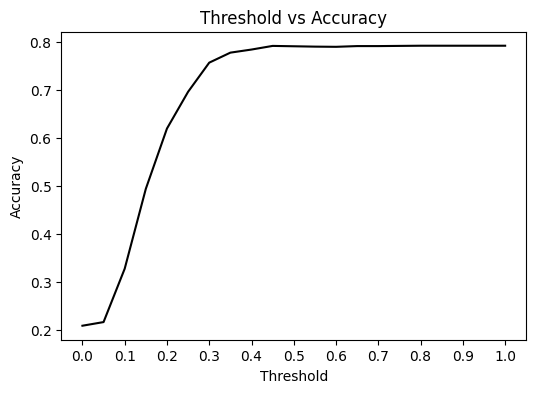

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(thresholds, accuracies, color='black')

plt.title('Threshold vs Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')

plt.xticks(np.linspace(0, 1, 11))

# plt.savefig('04_threshold_accuracy.svg')

plt.show()

 Test with small subset of features:

 numofproducts, geography, isactivemember

In [ ]:
small_subset = ['numofproducts', 'geography', 'isactivemember']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

val_dict_small = df_val[small_subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

exited_small = y_pred_small >= 0.50
(exited_small == y_val).mean()

accuracy_score(y_val, exited_small)

0.7912878787878788

Confusion Matrix

In [ ]:
size_val = len(y_val)
baseline = np.repeat(False,size_val)

accuracy_score(baseline,y_val)

true_positive = ((y_pred >= 0.5) & (y_val == 1)).sum()
false_positive = ((y_pred >= 0.5) & (y_val == 0)).sum()
false_negative = ((y_pred < 0.5) & (y_val == 1)).sum()
true_negative = ((y_pred < 0.5) & (y_val == 0)).sum()

confusion_table = np.array(
     # predict neg    pos
    [[true_negative, false_positive], # actual neg
     [false_negative, true_positive]]) # actual pos

confusion_table

array([[2055,   34],
       [ 520,   31]])

Confusion table shows:

1. False negative almost 20%, shows many accounts being ignored by the business and those accounts exited.

In [ ]:
confusion_table / confusion_table.sum()

array([[0.77840909, 0.01287879],
       [0.1969697 , 0.01174242]])

Precision, Recall

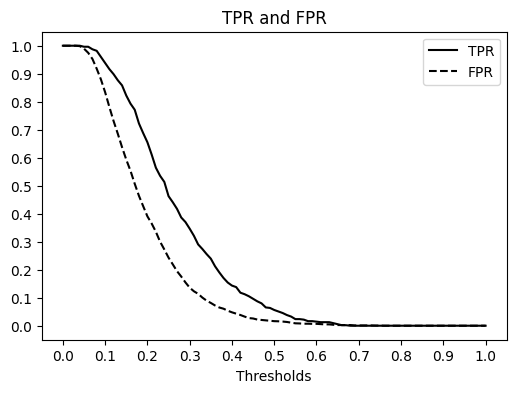

In [ ]:
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
precision, recall

scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds: #B
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

df_scores[::10]

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

df_scores[::10]

plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

Compare to random model

In [ ]:
np.random.seed(1)
y_rand = np.random.uniform(0,1,size=len(y_val))

y_rand

def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,551,2089,0,0,1.000000,1.000000
10,0.1,498,1892,53,197,0.903811,0.905697
20,0.2,448,1665,103,424,0.813067,0.797032
30,0.3,393,1453,158,636,0.713249,0.695548
40,0.4,346,1247,205,842,0.627949,0.596936
50,0.5,286,1048,265,1041,0.519056,0.501675
60,0.6,229,834,322,1255,0.415608,0.399234
70,0.7,166,610,385,1479,0.301270,0.292006
80,0.8,121,411,430,1678,0.219601,0.196745
90,0.9,64,202,487,1887,0.116152,0.096697


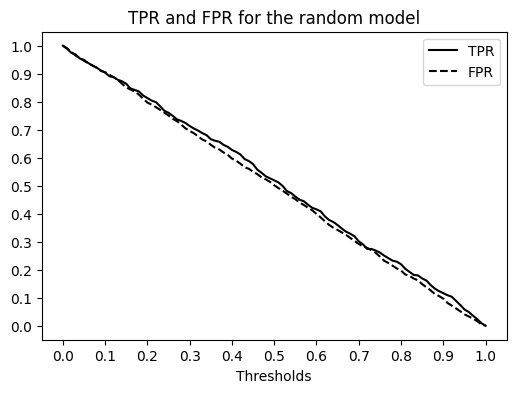

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(df_rand.threshold, df_rand.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the random model')

#plt.savefig('04_fpr_tpr_plot_random.svg')

plt.show()

Compare to ideal

In [ ]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)

df_ideal = tpr_fpr_dataframe(y_ideal, y_pred_ideal)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,551,2089,0,0,1.000000,1.000000
10,0.1,551,1825,0,264,1.000000,0.873624
20,0.2,551,1561,0,528,1.000000,0.747247
30,0.3,551,1297,0,792,1.000000,0.620871
40,0.4,551,1033,0,1056,1.000000,0.494495
50,0.5,551,769,0,1320,1.000000,0.368119
60,0.6,551,505,0,1584,1.000000,0.241742
70,0.7,551,241,0,1848,1.000000,0.115366
80,0.8,528,0,23,2089,0.958258,0.000000
90,0.9,264,0,287,2089,0.479129,0.000000


Ideal plot

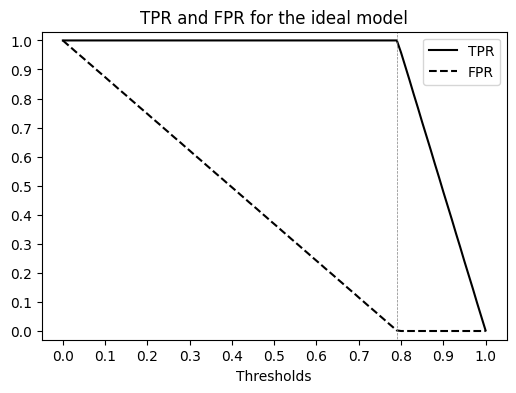

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(df_ideal.threshold, df_ideal.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.vlines(1 - y_val.mean(), -1, 2, linewidth=0.5, linestyle='dashed', color='grey')
plt.ylim(-0.03, 1.03)

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the ideal model')

# plt.savefig('04_fpr_tpr_plot_ideal.svg')

plt.show()

Compare the model to random and ideal

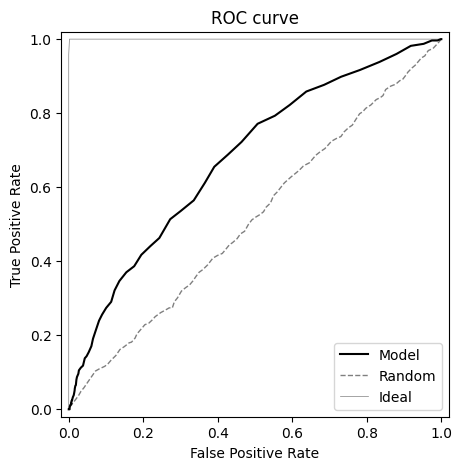

In [ ]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color='black', label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, color='black', lw=1,
         linestyle='dashed', alpha=0.5, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, color='black', lw=0.5,
         linestyle='solid', alpha=0.5, label='Ideal')

plt.legend()

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

# plt.savefig('04_roc_curve_with_baselines.svg')

plt.show()

AUC, ROC curve

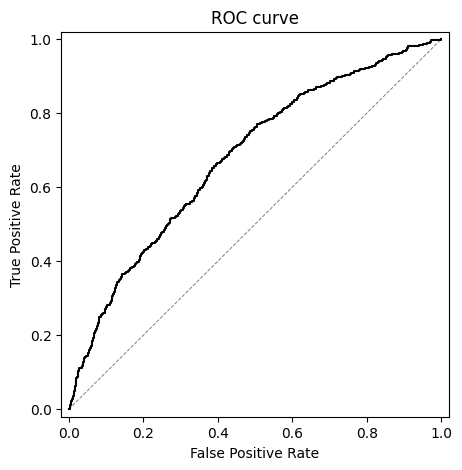

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

Observation:

1. Small set of features, the model has better ROC for FPR < 40%
2. Full set of features, the model has better ROC for FPR > 40%

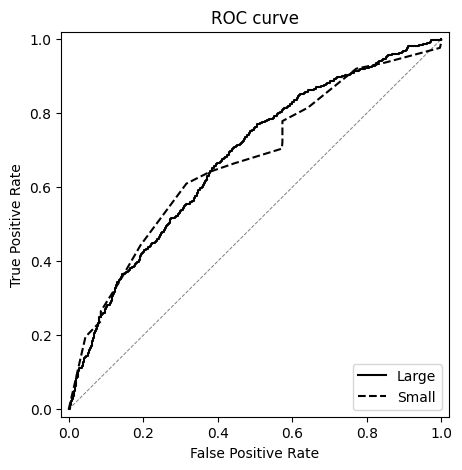

In [ ]:
fpr_large, tpr_large, _ = roc_curve(y_val, y_pred)
fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small)

plt.figure(figsize=(5, 5))

plt.plot(fpr_large, tpr_large, color='black', linestyle='solid', label='Large')
plt.plot(fpr_small, tpr_small, color='black', linestyle='dashed', label='Small')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')
plt.legend(loc='lower right')

plt.show()

Perform K-fold splits=10


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.exited.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.exited.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [ ]:
np.array(aucs).round(3)

print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.664 ± 0.014


Tune the model... we have logistic regression... and one of the hyperparams is C

In [ ]:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)

    return dv, model

nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

In [ ]:
for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.exited.values
        y_val = df_val.exited.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.663 ± 0.008
C=0.01, auc = 0.663 ± 0.008
C=0.1, auc = 0.663 ± 0.008
C=0.5, auc = 0.663 ± 0.008
C=1, auc = 0.663 ± 0.008
C=10, auc = 0.663 ± 0.008


In [ ]:
y_train = df_train_full.exited.values
y_test = df_test.exited.values

dv, model = train(df_train_full, y_train, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.684


Compare Full vs Tuned

1. After tuning hyperparameter "C", the plot shows some inprovement for FPR < 40%

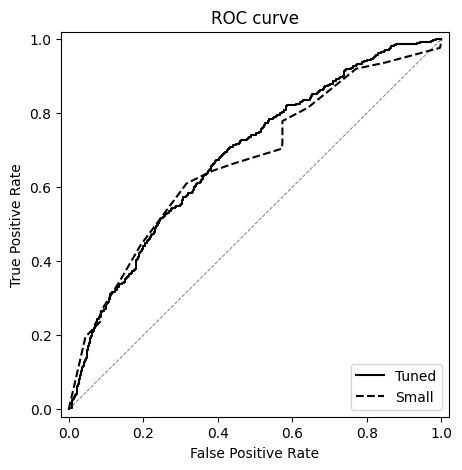

In [100]:
#fpr_large, tpr_large, _ = roc_curve(y_val, y_pred)
#fpr_small, tpr_small, _ = roc_curve(y_val, y_pred_small)

fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred)

plt.figure(figsize=(5, 5))

plt.plot(fpr_tuned, tpr_tuned, color='black', linestyle='solid', label='Tuned')
plt.plot(fpr_small, tpr_small, color='black', linestyle='dashed', label='Small')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')
plt.legend(loc='lower right')

plt.show()